In [1]:
%load_ext lab_black

In [2]:
from pathlib import Path

In [24]:
data = Path("data/04.txt").read_text()
# data = """Card 1: 41 48 83 86 17 | 83 86  6 31 17  9 48 53
# Card 2: 13 32 20 16 61 | 61 30 68 82 17 32 24 19
# Card 3:  1 21 53 59 44 | 69 82 63 72 16 21 14  1
# Card 4: 41 92 73 84 69 | 59 84 76 51 58  5 54 83
# Card 5: 87 83 26 28 32 | 88 30 70 12 93 22 82 36
# Card 6: 31 18 13 56 72 | 74 77 10 23 35 67 36 11"""

In [25]:
lines = [x.split(": ")[-1].split(" | ") for x in data.split("\n")]
lines = [[list(map(int, y.split())) for y in x] for x in lines]

In [19]:
points = 0
for card, numbers in lines:
    win_numbers = set(card) & set(numbers)
    l = len(win_numbers)  # l => points
    # 0 = -1 = 2^(-1)  ???
    # 1 = 1 = 2^0
    # 2 = 2 = 2^1
    # 3 = 4 = 2^2
    if len(win_numbers):
        # points += 2**(l - 1)
        points += 1 << (l - 1)
points

13

In [26]:
cnts = [1] * len(lines)
cnts

for i, (card, numbers) in enumerate(lines):
    win_numbers = set(card) & set(numbers)
    l = len(win_numbers)
    for j in range(i + 1, i + 1 + l):
        cnts[j] += cnts[i]
sum(cnts)

9236992

---

In [35]:
data = """LLR

AAA = (BBB, BBB)
BBB = (AAA, ZZZ)
ZZZ = (ZZZ, ZZZ)"""
data = Path("data/08.txt").read_text()

In [36]:
lines = data.split("\n")
commands, graph_data = lines[0], lines[2:]

In [37]:
graph = {}
for line in graph_data:
    name, leftright = line.split(" = ")
    leftright = leftright[1:-1].split(", ")
    graph[name] = leftright

In [38]:
current = "AAA"
dir_to_index = "LR"

k = 0
n_steps = 0
while current != "ZZZ":
    direction = commands[k]
    k += 1
    if k == len(commands):
        k = 0

    current = graph[current][dir_to_index.index(direction)]
    n_steps += 1
n_steps

23147

In [43]:
def get_steps_count(current, graph, commands):
    dir_to_index = "LR"
    k = 0
    n_steps = 0
    while not current.endswith("Z"):
        direction = commands[k]
        k += 1
        if k == len(commands):
            k = 0
        current = graph[current][dir_to_index.index(direction)]
        n_steps += 1
    return n_steps

In [45]:
for node in [k for k in graph if k.endswith("A")]:
    print(node, "-", get_steps_count(node, graph, commands))

NPA - 19631
HMA - 13771
GQA - 21389
CXA - 17287
AAA - 23147
VHA - 20803


In [49]:
def gcd(x, y):
    while y:
        x, y = y, x % y
    return abs(x)


def lcm(x, y):
    return x * y // gcd(x, y)

In [51]:
xs = [
    get_steps_count(node, graph, commands)
    for node in [k for k in graph if k.endswith("A")]
]

In [52]:
x = xs[0]
for y in xs[1:]:
    x = lcm(x, y)
x

22289513667691

----

In [55]:
import numpy as np

In [110]:
data = Path("data/10.txt").read_text()
data = """.....
.S-7.
.|.|.
.L-J.
....."""

A = data.split("\n")
A = np.array([list(x) for x in A])

In [111]:
posx, posy = np.where(A == "S")
posx, posy = posx[0], posy[0]
pos = (posx, posy)
pos

(1, 1)

In [247]:
print(A[20:25, 112:118])

[['7' '7' '|' 'L' '|' 'F']
 ['|' 'F' '7' 'F' 'J' 'L']
 ['|' '|' 'S' 'L' '-' '7']
 ['|' '|' '|' '|' 'F' 'J']
 ['L' 'J' 'L' '-' 'J' 'F']]

In [70]:
from enum import Enum


class Dir(Enum):
    UP = (-1, 0)
    DOWN = (1, 0)
    LEFT = (0, -1)
    RIGHT = (0, 1)

In [71]:
from typing import Tuple

In [119]:
change = {
    ("|", Dir.UP): Dir.UP,
    ("|", Dir.DOWN): Dir.DOWN,
    ("-", Dir.LEFT): Dir.LEFT,
    ("-", Dir.RIGHT): Dir.RIGHT,
    ("J", Dir.DOWN): Dir.LEFT,
    ("J", Dir.RIGHT): Dir.UP,
    ("F", Dir.LEFT): Dir.DOWN,
    ("F", Dir.UP): Dir.RIGHT,
    ("7", Dir.RIGHT): Dir.DOWN,
    ("7", Dir.UP): Dir.LEFT,
    ("L", Dir.DOWN): Dir.RIGHT,
    ("L", Dir.LEFT): Dir.UP,
}


def move(pos, symbol, direction):
    new_direction = change.get((symbol, direction))
    if new_direction is None:
        return pos, direction
    dy, dx = new_direction.value
    new_pos = (pos[0] + dy, pos[1] + dx)
    return new_pos, new_direction

---

In [120]:
from rich.jupyter import print

In [154]:
import pandas as pd

pd.set_option("display.width", 180)

In [243]:
data = """.....
.S-7.
.|.|.
.L-J.
....."""
data = Path("data/10.txt").read_text()

A = data.split("\n")
A = np.array([list(x) for x in A])

posy, posx = np.where(A == "S")
posy, posx = posy[0], posx[0]
pos = (posy, posx)
print(f"Initial: {pos}")

poly = set([pos])
cv_cnt = [np.array(pos).reshape(1, 2)]

direction = Dir.DOWN
symbol = A[pos[0], pos[1]]
pos = (posy + 1, posx)
symbol = A[pos[0], pos[1]]
poly.add(pos)
cv_cnt.append(np.array(pos).reshape(1, 2))

while symbol != "S":
    pos, direction = move(pos, symbol, direction)
    poly.add(pos)
    cv_cnt.append(np.array(pos).reshape(1, 2))
    symbol = A[pos[0], pos[1]]
cv_cnt = np.array(cv_cnt)

Initial: (22, 114)

In [244]:
import cv2

import matplotlib.pyplot as plt

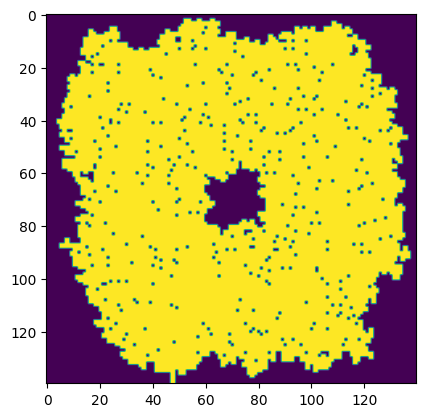

In [245]:
mask = np.zeros_like(A, dtype=np.uint8)
mask = cv2.drawContours(mask, [cv_cnt], -1, 1)

plt.imshow(mask)
plt.show()

In [246]:
answer = 0
for y in range(len(A)):
    for x in range(len(A[0])):
        if (y, x) in poly:
            continue
        is_inside = cv2.pointPolygonTest(cv_cnt, (y, x), False) == 1
        answer += int(is_inside)
answer

529